In [68]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.stats import norm
pd.set_option('display.max_colwidth', None)
from scipy.optimize import minimize
from scipy.optimize import fsolve
from scipy.integrate import quad
import scipy.integrate as integrate
import scipy.special as special
import math
import random
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11, 5)  #set default figure size
import quantecon as qe
# from mpl_toolkits.mplot3d import Axes3D
from math import sqrt
# from pylab import plot, show, grid, xlabel, ylabel
import copy
import scipy.stats as stats
import seaborn as sns  # for nicer graphics
import plotly.express as px
import os
import json
import itertools
from collections import Counter
import datetime
from dateutil import parser
pd.plotting.register_matplotlib_converters()
import re

In [45]:
jsons = [i for i in os.listdir() if '.json' in i]
jsons

['Follow.json',
 'Inferences.json',
 'Userdata.json',
 'SearchQueries.json',
 'Playlist1.json',
 'StreamingHistory0.json',
 'YourLibrary.json',
 'FamilyPlan.json',
 'Payments.json']

In [46]:
obj = []
for i in range(len(jsons)):
    # read file
    with open(jsons[i], 'r') as myfile:
        data=myfile.read()

    # parse file
    obj.append(json.loads(data))

# 4. Information from Playlists

In [47]:
[i['name'] for i in obj[4]['playlists']]

['Local',
 '❤️',
 'Classical',
 'Blues Lounge',
 'Liked from Radio',
 '🎤🎵🎶',
 '你好',
 'Trumpeteer',
 'Sax',
 'Blue Note',
 'T.S.',
 'Disney',
 '🔥',
 '☀️',
 'Rock n Roll',
 'Black Soul',
 'Shower',
 'Billy Joel',
 'Coldplay',
 'Workout',
 'Epic',
 'gangsta',
 'Indie',
 'Ayumi',
 'Final Fantasy',
 'Final Fantasy VIII Fithos Lusec Wecos Vinosec',
 'Hits',
 'Prince',
 'KIV',
 'X',
 'Jazz it up',
 'Suits',
 'G(old)',
 'no habló español',
 'BPM',
 'Covers',
 'Sentimental',
 'Sleeping',
 'Lounge',
 'Pop hits',
 'DL']

In [48]:
items = [item['track'] for sublist in [i['items'] for i in obj[4]['playlists']] for item in sublist if item['track']]
tracks = [i['trackName'] for i in items]
artists = [i['artistName'] for i in items]
albums = [i['albumName'] for i in items]

In [49]:
Counter(tracks).most_common()

[('Way Down In The Hole', 6),
 ('Way Down in the Hole', 5),
 ('Dance Me To The End Of Love', 5),
 ('Smooth Operator', 5),
 ('Summer in Paris', 4),
 ('The Girl From Ipanema', 4),
 ('Just the Way You Are', 4),
 ('Starlight', 4),
 ('Impossible', 4),
 ('Chasing Pirates', 3),
 ('Roxanne - Remastered 2003', 3),
 ('Cold, Cold Heart - Live In Chicago', 3),
 ('Home', 3),
 ('Cocaine Model', 3),
 ("How Far I'll Go", 3),
 ('Superstition', 3),
 ("(Don't Worry) If There's a Hell Below We're All Going to Go - Single Version",
  3),
 ('Assume the Position', 3),
 ('La Mer', 3),
 ('Hey Eugene', 3),
 ('Fly Me To The Moon (In Other Words)', 3),
 ('Wind Of Change', 3),
 ('Have You Ever Seen The Rain', 3),
 ("Don't Know Why", 3),
 ('So What (feat. John Coltrane, Cannonball Adderley & Bill Evans)', 3),
 ('Unforgettable', 3),
 ('Dream A Little Dream Of Me', 3),
 ('Stuck on the puzzle', 3),
 ('One Night in Bangkok', 3),
 ('Pale Blue Eyes', 3),
 ('Every Breath You Take - Remastered 2003', 3),
 ('Unwell - 2007 R

In [50]:
Counter(artists).most_common()

[('Taylor Swift', 42),
 ('Nobuo Uematsu', 26),
 ('Norah Jones', 19),
 ('Coldplay', 18),
 ('Ramin Djawadi', 17),
 ('Miles Davis', 16),
 ('Billy Joel', 15),
 ('Prince', 15),
 ('Stevie Wonder', 14),
 ('Jay Chou', 14),
 ('Eminem', 14),
 ('X JAPAN', 13),
 ('Kanye West', 12),
 ('Franz Liszt', 10),
 ('Pink Martini', 9),
 ('Frank Sinatra', 9),
 ("Guns N' Roses", 9),
 ('Diana Krall', 9),
 ('Pink Floyd', 9),
 ('P!nk', 9),
 ('The Police', 8),
 ('Ayumi Hamasaki', 8),
 ('Madeleine Peyroux', 7),
 ('Andrew Lloyd Webber', 7),
 ('Jayesslee', 7),
 ('Bill Withers', 6),
 ('The Blind Boys Of Alabama', 5),
 ('Steve Earle', 5),
 ('ZHU', 5),
 ('Sade', 5),
 ('Nina Simone', 5),
 ('Maroon 5', 5),
 ('Keane', 5),
 ('Calvin Harris', 5),
 ('Carlos Rafael Rivera', 5),
 ('Ingrid Michaelson', 5),
 ('Santana', 5),
 ("Auli'i Cravalho", 4),
 ('Bea Parks', 4),
 ('Stan Getz', 4),
 ('Duke Ellington', 4),
 ('Herbie Hancock', 4),
 ('Ray Charles', 4),
 ('Ella Fitzgerald', 4),
 ('Phil Collins', 4),
 ('Lyla Foy', 4),
 ('BØRNS', 4

# 5. Information from play history

In [51]:
songs = [i['trackName'] for i in obj[5] if i['trackName'] != 'Unknown Track']
artists = [i['artistName'] for i in obj[5] if i['trackName'] != 'Unknown Track']

In [52]:
Counter(songs).most_common()

[('Hang on Little Tomato', 248),
 ('Hey Eugene', 213),
 ('Way Down in the Hole', 198),
 ('Chasing Pirates', 189),
 ('What Am I To You?', 169),
 ('Roxanne', 154),
 ('Don’t Be Denied - Recorded At Spotify Studios NYC', 133),
 ('Cold, Cold Heart - Live In Chicago', 126),
 ('Assume the Position', 117),
 ("(Don't Worry) If There's a Hell Below We're All Going to Go - Single Version",
  112),
 ('Summer in Paris', 103),
 ('Passionfruit', 90),
 ('Way Down In The Hole', 88),
 ('Home', 77),
 ("Fool's Gold", 69),
 ('Cocaine Model', 68),
 ('Different Now', 68),
 ('Strangers In The Night', 62),
 ('Sunrise', 62),
 ('I Will Possess Your Heart', 61),
 ('Riding with the King', 60),
 ('State Of Grace', 60),
 ('Venus', 60),
 ('Lunatique', 57),
 ('Blank Space', 55),
 ("I Can't Remember Love (Music from the Netflix Limited Series The Queen's Gambit)",
  54),
 ('Time After Time', 48),
 ('菊花台', 48),
 ('Ce soir', 48),
 ('外婆', 46),
 ('Just a Friend', 45),
 ('Heaven Is a Place on Earth', 44),
 ('屋頂', 44),
 ('Ba

In [53]:
Counter(artists).most_common()

[('Norah Jones', 814),
 ('Pink Martini', 523),
 ('Taylor Swift', 520),
 ('Eminem', 242),
 ('Jay Chou', 212),
 ('Nobuo Uematsu', 208),
 ('Frank Sinatra', 170),
 ('The Police', 157),
 ('The Blind Boys Of Alabama', 149),
 ('Eric Clapton', 143),
 ('Stevie Wonder', 134),
 ('Steve Earle', 126),
 ('Lafayette Gilchrist', 119),
 ('Curtis Mayfield', 112),
 ('Bea Parks', 103),
 ('Drake', 90),
 ('BØRNS', 85),
 ('Edward Sharpe & The Magnetic Zeros', 77),
 ('Death Cab for Cutie', 77),
 ('Dagny', 69),
 ('ZHU', 68),
 ('Chastity Belt', 68),
 ('Think Fast, Talk Smart: Communication Techniques.', 65),
 ('Diana Krall', 60),
 ('Shocking Blue', 60),
 ('Stereo Total', 57),
 ('X JAPAN', 56),
 ('Anna Hauss', 54),
 ('Claude Debussy', 53),
 ('Cyndi Lauper', 48),
 ('Kumisolo', 48),
 ('Biz Markie', 45),
 ('Belinda Carlisle', 44),
 ('Landy Wen', 44),
 ('Madeleine Peyroux', 43),
 ('Sade', 42),
 ('Lyla Foy', 42),
 ('Ingrid Michaelson', 42),
 ('Ayumi Hamasaki', 41),
 ('Erik Satie', 39),
 ('Bill Withers', 38),
 ('Amy W

### Correct timezone difference (- 4 hours)

In [54]:
parser.parse(obj[5][-1]['endTime']) - datetime.timedelta(hours=4)
for i in obj[5]:
    i['endTime'] = parser.parse(i['endTime']) - datetime.timedelta(hours=4)

In [55]:
obj[5][0]

{'endTime': datetime.datetime(2020, 3, 5, 19, 14),
 'artistName': 'Unknown Artist',
 'trackName': 'Unknown Track',
 'msPlayed': 137872}

In [56]:
obj[5][-1]

{'endTime': datetime.datetime(2021, 3, 7, 19, 6),
 'artistName': 'Taylor Swift',
 'trackName': 'the 1',
 'msPlayed': 210240}

In [79]:
re.sub('[\(\)]','','weekday()(fdsfds)(fdfs(()')

'weekdayfdsfdsfdfs'

In [73]:
df = pd.DataFrame(obj[5])
time_quantums = ['year','month','day','hour','minute','weekday()']
for quantum in time_quantums:
    df[re.sub('[\(\)]','',quantum)] = eval("df['endTime'].apply(lambda x:x."+quantum+")")

In [14]:
df = pd.DataFrame(obj[5])
df['year'] = df['endTime'].apply(lambda x:x.year)
df['month'] = df['endTime'].apply(lambda x:x.month)
df['day'] = df['endTime'].apply(lambda x:x.day)
df['hour'] = df['endTime'].apply(lambda x:x.hour)
df['minute'] = df['endTime'].apply(lambda x:x.minute)
df['weekday'] = df['endTime'].apply(lambda x:x.weekday())

In [74]:
df.head()

,endTime,artistName,trackName,msPlayed,year,month,day,hour,minute,weekday
0,2020-03-05 19:14:00,Unknown Artist,Unknown Track,137872,2020,3,5,19,14,3
1,2020-03-06 20:19:00,Pink Martini,Hang on Little Tomato,196893,2020,3,6,20,19,4
2,2020-03-06 20:20:00,Unknown Artist,Unknown Track,5951,2020,3,6,20,20,4
3,2020-03-06 20:23:00,Pink Martini,Hey Eugene,245366,2020,3,6,20,23,4
4,2020-03-06 20:26:00,Creedence Clearwater Revival,Have You Ever Seen The Rain,160133,2020,3,6,20,26,4


In [16]:
hours_freq = Counter(df['hour'])
hours_list = pd.DataFrame(sorted(list(hours_freq.items())))

<BarContainer object of 22 artists>

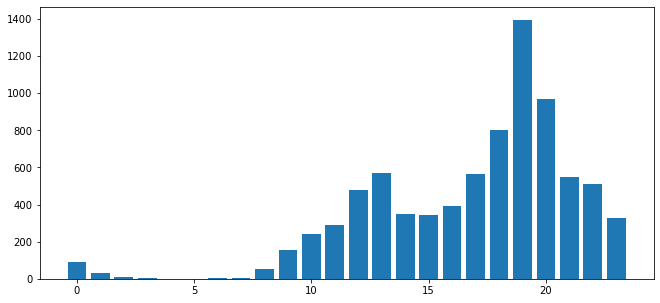

In [17]:
plt.bar(hours_freq.keys(), hours_freq.values())

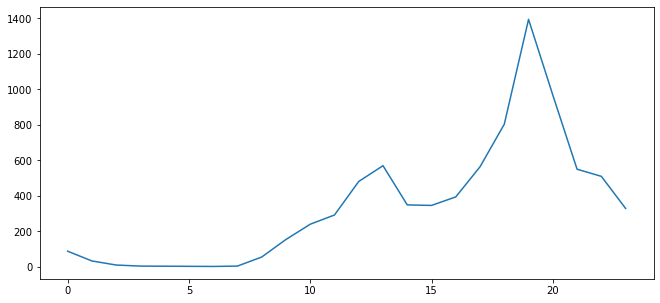

In [18]:
plt.plot(hours_list[0], hours_list[1])

In [19]:
weekdays = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
hours_freq, hours_list = [], []
for i in range(7):
    hours_freq.append(Counter(df.loc[df['weekday']==i,'hour']))
    hours_list.append(pd.DataFrame(sorted(list(hours_freq[i].items()))))

### Playback minutes

In [20]:
df.head()

,endTime,artistName,trackName,msPlayed,year,month,day,hour,minute,weekday
0,2020-03-05 19:14:00,Unknown Artist,Unknown Track,137872,2020,3,5,19,14,3
1,2020-03-06 20:19:00,Pink Martini,Hang on Little Tomato,196893,2020,3,6,20,19,4
2,2020-03-06 20:20:00,Unknown Artist,Unknown Track,5951,2020,3,6,20,20,4
3,2020-03-06 20:23:00,Pink Martini,Hey Eugene,245366,2020,3,6,20,23,4
4,2020-03-06 20:26:00,Creedence Clearwater Revival,Have You Ever Seen The Rain,160133,2020,3,6,20,26,4


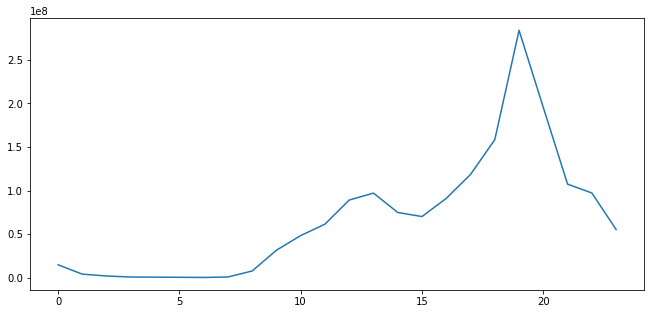

In [21]:
plt.plot(df.groupby(['hour'])['msPlayed'].sum())

In [22]:
df_group = df.groupby(['weekday','hour'])['msPlayed'].sum()

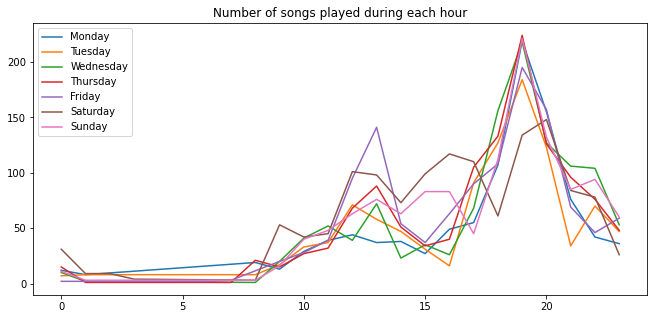

In [32]:
fig, ax = plt.subplots()
for i in range(7):
    ax.plot(hours_list[i][0], hours_list[i][1],label=weekdays[i])
ax.legend()
ax.set_title('Number of songs played during each hour')
plt.show()

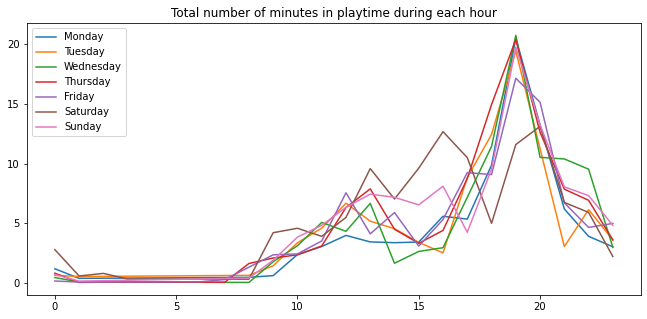

In [24]:
for i in range(7):
    plt.plot(df_group[i]/(365*100*60),label=weekdays[i])
plt.legend()
plt.title('Total number of minutes in playtime during each hour')
plt.show()

In [25]:
df.head()

,endTime,artistName,trackName,msPlayed,year,month,day,hour,minute,weekday
0,2020-03-05 19:14:00,Unknown Artist,Unknown Track,137872,2020,3,5,19,14,3
1,2020-03-06 20:19:00,Pink Martini,Hang on Little Tomato,196893,2020,3,6,20,19,4
2,2020-03-06 20:20:00,Unknown Artist,Unknown Track,5951,2020,3,6,20,20,4
3,2020-03-06 20:23:00,Pink Martini,Hey Eugene,245366,2020,3,6,20,23,4
4,2020-03-06 20:26:00,Creedence Clearwater Revival,Have You Ever Seen The Rain,160133,2020,3,6,20,26,4


In [26]:
df['date'] = df['endTime'].apply(lambda x:x.date())
df['month_year'] = df['endTime'].dt.to_period('M')
df['month_year'] = df['endTime'].apply(lambda x:x.date())
artists_of_interest = ['Norah Jones','Pink Martini','Taylor Swift']

In [27]:
df['endTime'][1].date()

datetime.date(2020, 3, 6)

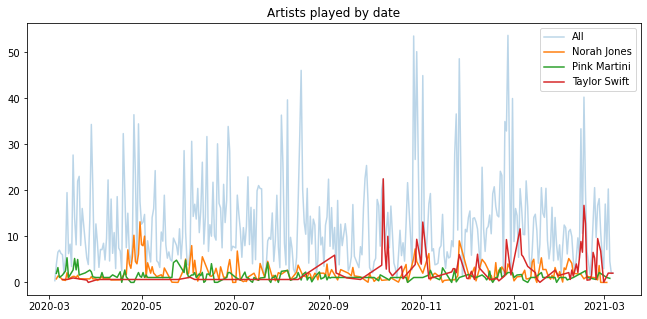

In [28]:
ms_to_hour = 100*60*60
df_date = df.groupby(['date'])['msPlayed'].sum()
plt.plot(df_date/ms_to_hour,label='All', alpha=0.3)
for artist in artists_of_interest:
    plt.plot(df[df.artistName==artist].groupby(['date'])['msPlayed'].sum()/ms_to_hour, label = artist)
# plt.plot(df[~df.artistName.isin(artists_of_interest)].groupby(['date'])['msPlayed'].sum()/ms_to_hour, label = 'Others')
plt.title('Artists played by date')
plt.legend()
plt.show()

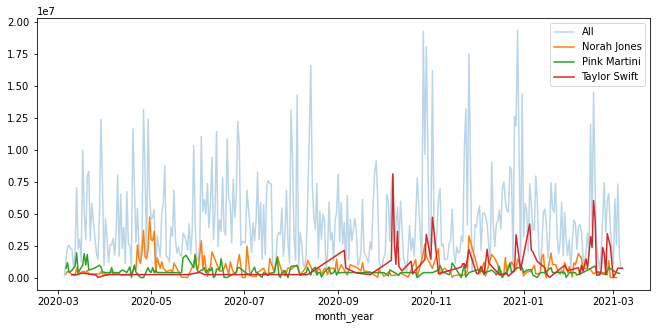

In [29]:
df_month = df.groupby(['month_year'])['msPlayed'].sum()
fig, ax = plt.subplots()
df_month.plot(label='All',alpha=0.3)
for artist in artists_of_interest:
    df[df.artistName==artist].groupby(['month_year'])['msPlayed'].sum().plot(label = artist)
# plt.plot(df_month,label='All')
# for artist in artists_of_interest:
#     plt.plot(df[df.artistName==artist].groupby(['month_year'])['msPlayed'].sum(), label = artist)
plt.legend()
plt.show()

In [30]:
obj[6]

{'tracks': [{'artist': 'Coldplay',
   'album': 'Viva La Vida or Death and All His Friends',
   'track': 'Violet Hill'},
  {'artist': 'Norah Jones',
   'album': 'Come Away With Me',
   'track': 'Cold Cold Heart'},
  {'artist': 'Taylor Swift', 'album': 'Red', 'track': 'The Moment I Knew'},
  {'artist': 'Norah Jones',
   'album': 'Day Breaks',
   'track': 'Burn - Live In NYC'},
  {'artist': 'Norah Jones',
   'album': 'Not Too Late',
   'track': 'Thinking About You'},
  {'artist': 'Yann Tiersen',
   'album': 'Amelie from Montmartre',
   'track': "Comptine d'un autre été: la démarche"},
  {'artist': 'DJ Technics',
   'album': '...and all the pieces matter, Five Years of Music from The Wire',
   'track': 'My Life Extra'},
  {'artist': 'Yann Tiersen',
   'album': 'Amelie from Montmartre',
   'track': "L'Autre valse d'Amélie"},
  {'artist': 'Norah Jones', 'album': 'The Fall', 'track': 'Young Blood'},
  {'artist': 'The Wire',
   'album': '...and all the pieces matter, Five Years of Music from T